In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks
from scipy.signal import peak_widths

def theta(E):
    return 180 / np.pi * np.arcsin(const.h * const.c / (2 * 201.4e-12 * const.e * E))


def sigma(E, Z):
    return Z - np.sqrt((E / 13.6) - ((1 / 137) ** 2 * Z ** 4) / 4)


def s1(E):
    return 29 - np.sqrt(E / 13.6)


def s2(E, s1):
    return 29 - np.sqrt(4 * (29 - s1) ** 2 - 4 * E / 13.6)


def s3(E, s1):
    return 29 - np.sqrt(9 * (29 - s1) ** 2 - 9 * E / 13.6)


def energ(the):
    return const.h * const.c / (2 * 201.4e-12 * np.sin(np.pi / 180 * the) * const.e)

21.5
13546.72532056334
13.133333333333333


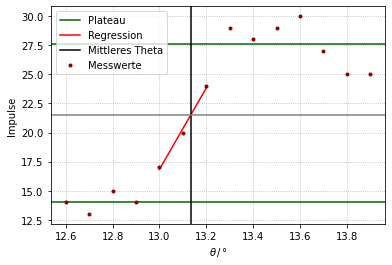

In [24]:
# Brom
data = pd.read_csv('tables/messdaten/Messung_Brom/Brom_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

rel_min = np.min(y)
rel_max = np.max(y)
theta_mitte_y = (rel_max - rel_min) / 2
theta_mitte = (x[y==rel_max] - x[y==rel_min]) / 2


x1 = np.diff(y)
# print(x1)
tolger = 3
x3 = []
x4 = []
x8 = []
n = 0
for i in range(len(x1)):
    if n == 0:
        if abs(x1[i]) < tolger:
            x3.append(i)
        else:
            x8.append(i)
            n = 1
    else:
        if abs(x1[i]) < tolger:
            x4.append(i)

        else:
            x8.append(i)
            n = 1

x5 = []
for i in range(len(x3)):
    x5.append(y[x3[i]])

plt.axhline(np.mean(x5),c='darkgreen',  label='Plateau')
x6 = []
for i in range(len(x4)):
    x6.append(y[x4[i]])

plt.axhline(np.mean(x6), c='darkgreen')
y2 = np.mean(x6) + (np.mean(x5) - np.mean(x6)) / 2
regx = x[x8]
regy = y[x8]
regx = regx[1:-1]
regy = regy[1:-1]


def f(x, a, b):
    return a * x + b


params, covariance_matrix = curve_fit(f, regx, regy)

plt.plot(
    regx,
    f(regx, params[0], params[1]),
    color="red",
    ms=4,
    marker="",
    linestyle="-",
    label="Regression",
)
theta_x = (rel_min + theta_mitte_y - params[1]) / (params[0])
plt.axvline(theta_x, c='k', label='Mittleres Theta')
plt.axhline(rel_min + theta_mitte_y, c='grey')

plt.plot(x, y, color="darkred", ms=6, marker=".", linestyle="", label="Messwerte")
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle=":")


energy = energ(theta_x)
print(energy)
print(theta_x)